<a href="https://colab.research.google.com/github/Moshiii/pytorch_snippet/blob/master/sum_10_pytorch_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
import torch
import random
from torchsummary import summary
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
class Feedforward(torch.nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Feedforward, self).__init__()
    self.input_size = input_size
    self.hidden_size  = hidden_size
    self.output_size = output_size 
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(self.hidden_size, output_size)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

In [0]:
import seaborn as sns
class ModelLog:

  def __init__(self, model):
      self.rec_dic={0:[],1:[]}
      self.model = model
      self.idx=0
  def model_weight_vis(self):
      model_list = [m for m in self.model.modules()]
      w_layer_1 = model_list[1].weight.data.clone()
      w_layer_2 = model_list[3].weight.data.clone()
      self.rec_dic[0].append(w_layer_1.clone())
      self.rec_dic[1].append(w_layer_2.clone())

  def show_tensor(self,dataset,v_range):
    self.idx+=1
    ds=dataset.numpy()
    # sns.set()
    # fig = plt.figure()
    # plt.figure(self.idx)
    plt.figure(self.idx,figsize=(10, 10))
    # sns.heatmap(data=dataset, ax=fig)
    # ax = sns.heatmap(dataset)
    if v_range:
      sns.heatmap(ds, annot=True, linewidths=.5, vmin=v_range[0], vmax=v_range[1])
    else:
      sns.heatmap(ds, annot=True, linewidths=.5)

    # plt.figure()
    # plt.imshow(ds)
    # plt.colorbar(ds)

  def print_tensor(self,tsr):
    numpy.set_printoptions(suppress=True)
    print(numpy.round(tsr.numpy(), decimals=2))

  def dump_all_weights(self):
    #self.dump_weight(self.rec_dic[0])
    self.dump_weight(self.rec_dic[1])

  def dump_weight(self,tensor_list):
      for i,t in enumerate(tensor_list):
        if i>1:
          self.show_tensor((tensor_list[i]-tensor_list[i-1])*100/tensor_list[i])

In [0]:
def get_sum_data(n_samples=55,shuffle=True):
  numbers=list(range(0,10))
  pair=[]
  for a in numbers:
    for b in numbers:
      if a+b<10:
        y_scatter=[0]*10
        y_scatter[a+b]=1
        pair+=[[[a,b],y_scatter]]
  random.shuffle(pair)
  pair=pair[:n_samples] 
  x_train = [x[0] for x in pair]
  y_train = [y[1] for y in pair]
  return x_train, y_train
#get_sum_data(5)

In [0]:
FF_model = Feedforward(2, 10, 10)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(FF_model.parameters(), lr = 0.015)

In [0]:
x_train, y_train = get_sum_data(55)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test, y_test = get_sum_data(5)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)



In [0]:
#ModelLog.show_tensor(x_test)
#ModelLog.show_tensor(y_test)

In [0]:
def one_hot_to_num(one_hot):
  return [i for i, j in enumerate(a)if j == max(a)]


In [9]:
FF_model.eval()
y_pred = FF_model(x_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.6646050810813904


Epoch 0: train loss: 0.6767644882202148
Test loss before training================ 0.6588601469993591
Epoch 50000: train loss: 0.20244531333446503
Test loss before training================ 0.2222517430782318
Epoch 100000: train loss: 0.15320482850074768
Test loss before training================ 0.18704469501972198
Epoch 150000: train loss: 0.1238214522600174
Test loss before training================ 0.1635161191225052
Epoch 200000: train loss: 0.10050372779369354
Test loss before training================ 0.13060319423675537
Epoch 250000: train loss: 0.07748021930456161
Test loss before training================ 0.09940583258867264
Epoch 300000: train loss: 0.06221909821033478
Test loss before training================ 0.08238636702299118
Epoch 350000: train loss: 0.051990486681461334
Test loss before training================ 0.07264760881662369
Epoch 400000: train loss: 0.042517099529504776
Test loss before training================ 0.06327375769615173
Epoch 450000: train loss: 0.033118523

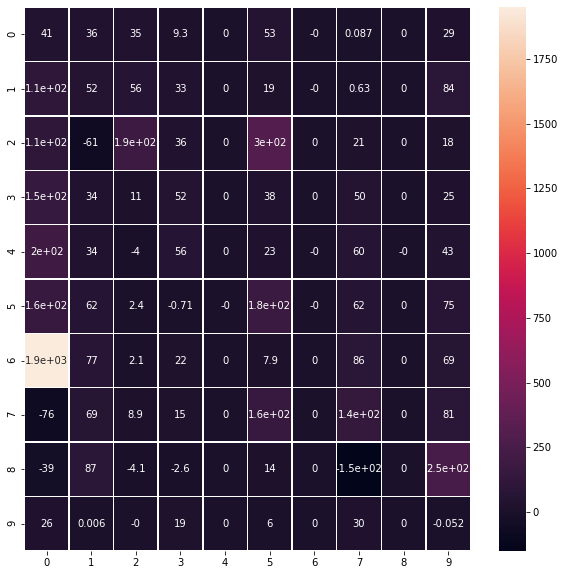

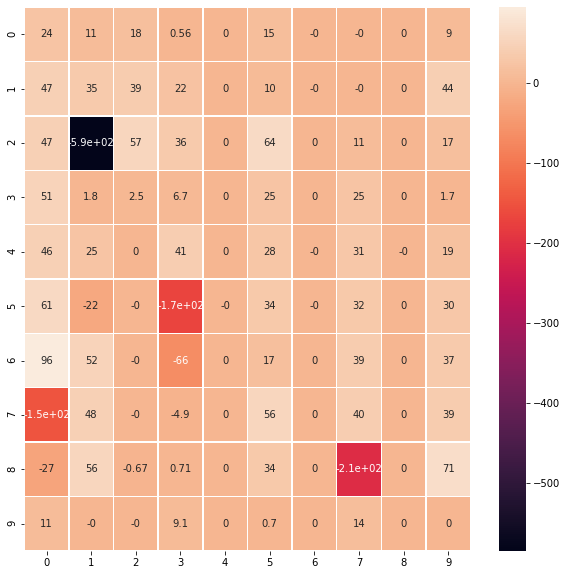

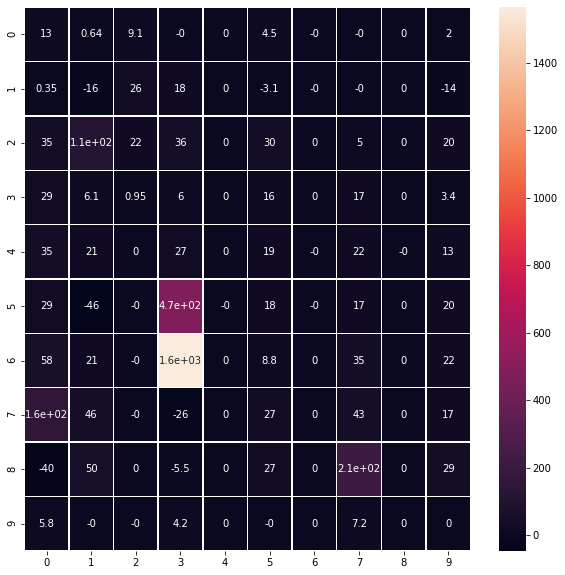

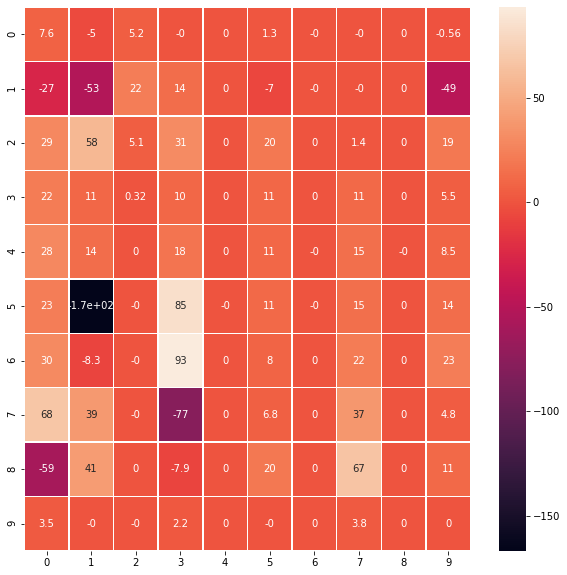

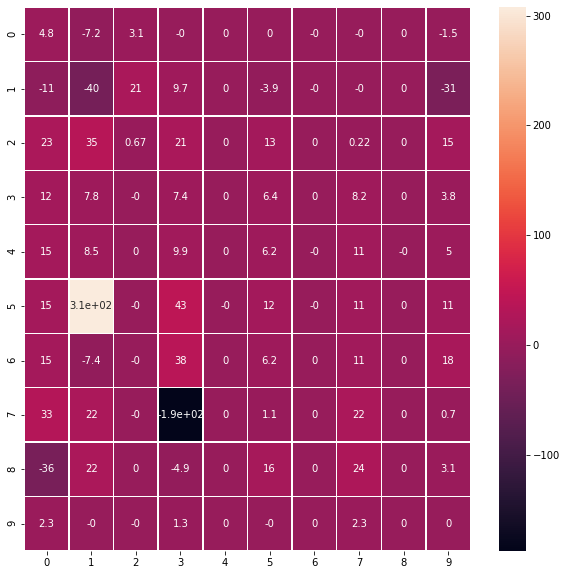

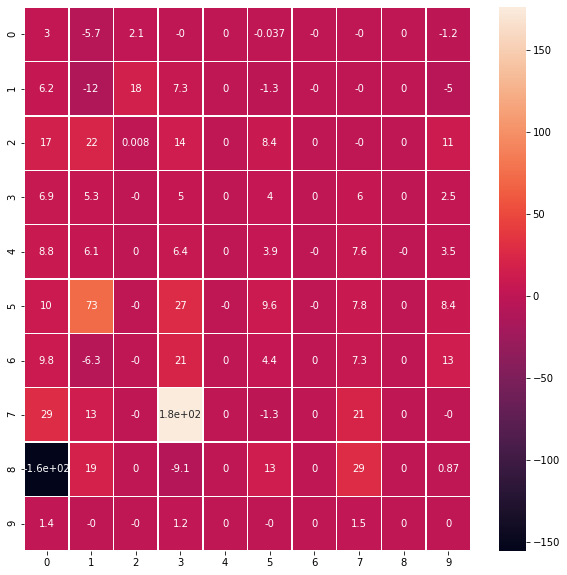

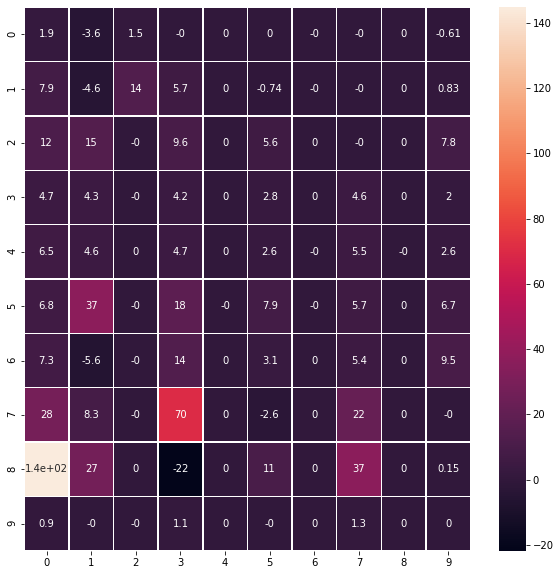

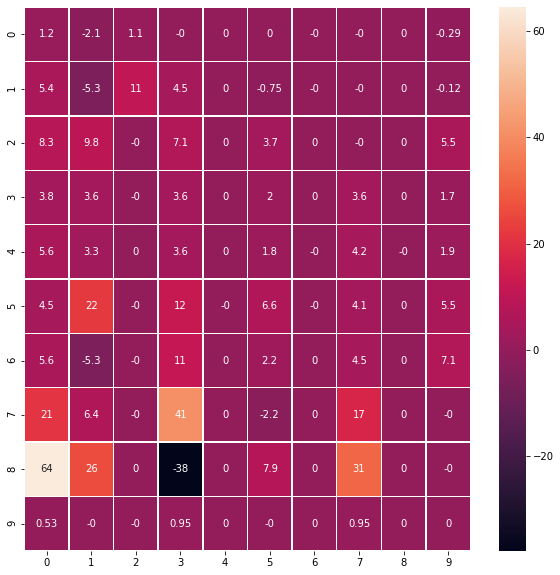

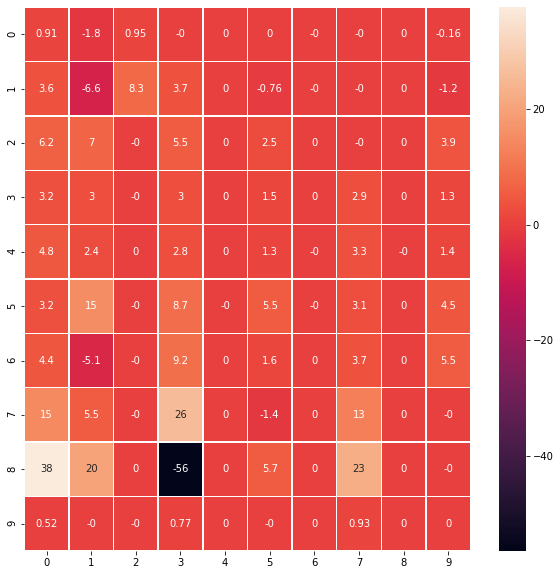

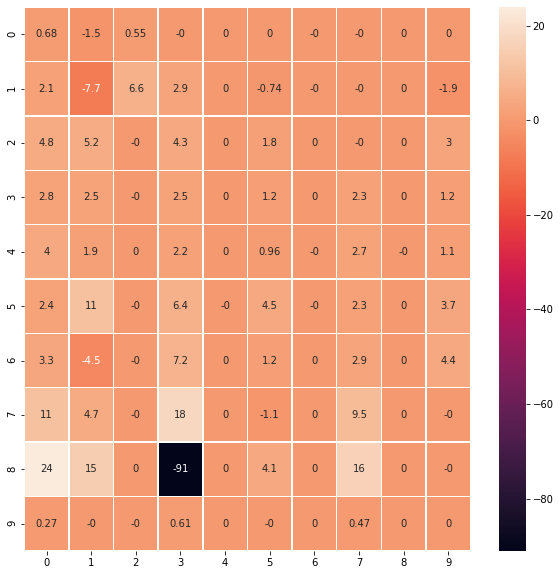

In [10]:
FF_model.train()
epoch = 600000

record_tracker= ModelLog(FF_model)

for epoch in range(epoch):
    FF_model.train()
    optimizer.zero_grad()
    # record_tracker.model_weight_vis()
    y_pred = FF_model(x_train)# foward    
    loss = criterion(y_pred.squeeze(), y_train)
   
    loss.backward()
    optimizer.step()

    if epoch % 50000 == 0:
      record_tracker.model_weight_vis()
      print('Epoch {}: train loss: {}'.format(epoch, loss.item())) 
      FF_model.eval()
      y_pred = FF_model(x_test) 
      before_train = criterion(y_pred.squeeze(), y_test)
      print('Test loss before training================' , before_train.item())
# record_tracker.dump_all_weights()

In [11]:
FF_model.eval()
y_pred = FF_model(x_test)
after_train = criterion(y_pred.squeeze(), y_test) 
print(x_test)
print(y_pred)
for a in y_pred:
  res = one_hot_to_num(a)
  print(res)

tensor([[6., 1.],
        [4., 4.],
        [3., 4.],
        [2., 3.],
        [1., 6.]])
tensor([[0.0000e+00, 0.0000e+00, 4.3076e-29, 1.3064e-36, 4.1007e-15, 8.1743e-10,
         2.9180e-02, 8.6875e-01, 9.3747e-02, 1.4273e-09],
        [0.0000e+00, 0.0000e+00, 1.0769e-37, 0.0000e+00, 1.1516e-22, 5.8280e-17,
         7.9244e-06, 6.5975e-02, 8.2334e-01, 1.2339e-03],
        [0.0000e+00, 0.0000e+00, 4.2663e-29, 1.2556e-36, 3.9864e-15, 8.0833e-10,
         2.8982e-02, 8.6734e-01, 9.2893e-02, 1.4231e-09],
        [6.7462e-31, 2.3489e-30, 2.3347e-13, 2.0221e-13, 1.0637e-02, 9.3940e-01,
         3.5081e-02, 4.4609e-05, 1.0153e-12, 1.9371e-21],
        [0.0000e+00, 0.0000e+00, 4.2390e-29, 1.2229e-36, 3.9119e-15, 8.0233e-10,
         2.8850e-02, 8.6640e-01, 9.2326e-02, 1.4203e-09]],
       grad_fn=<SigmoidBackward>)
[7]
[8]
[7]
[5]
[7]


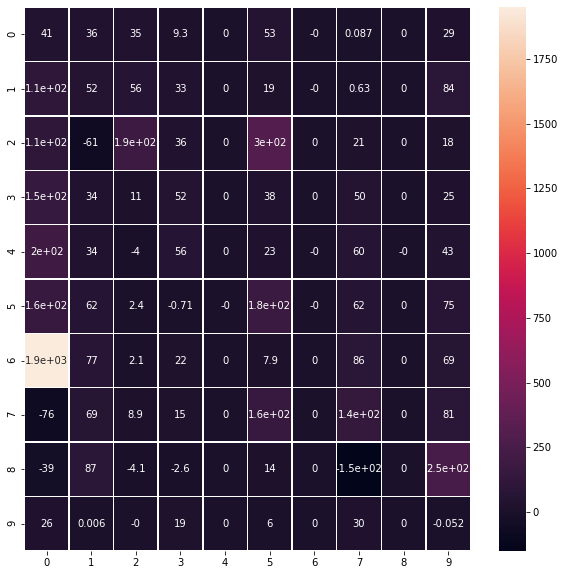

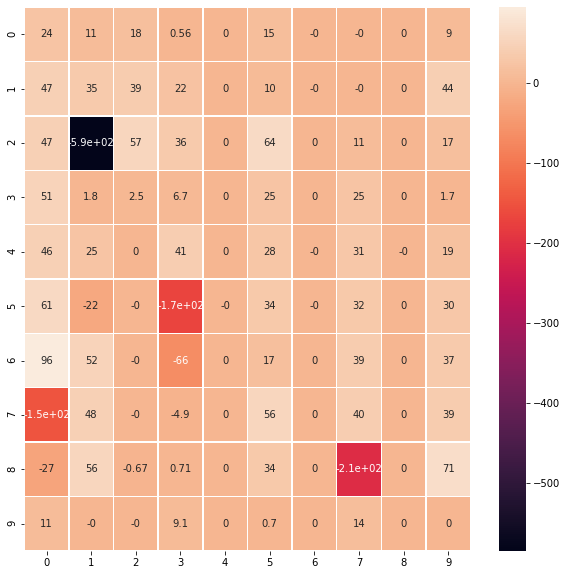

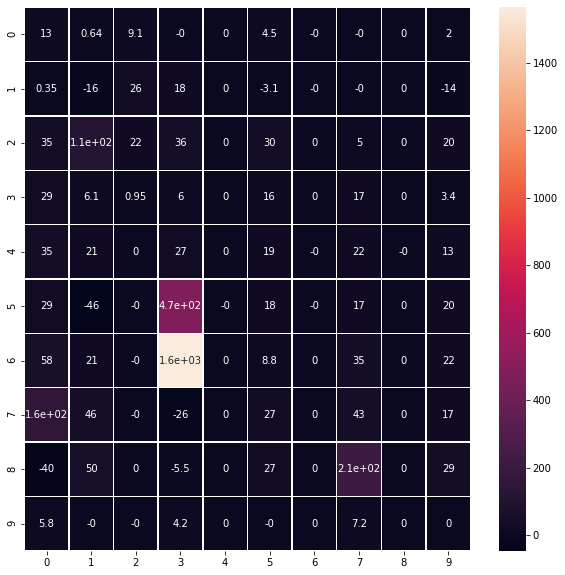

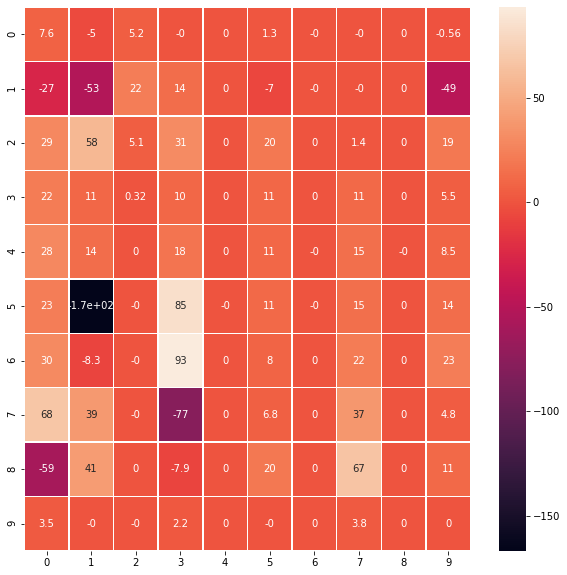

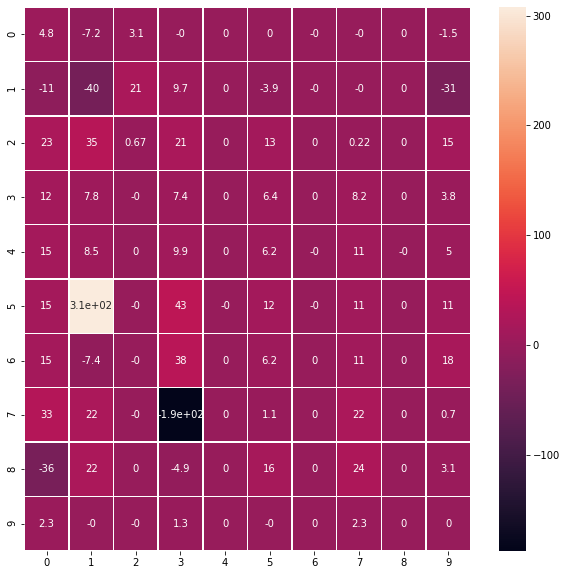

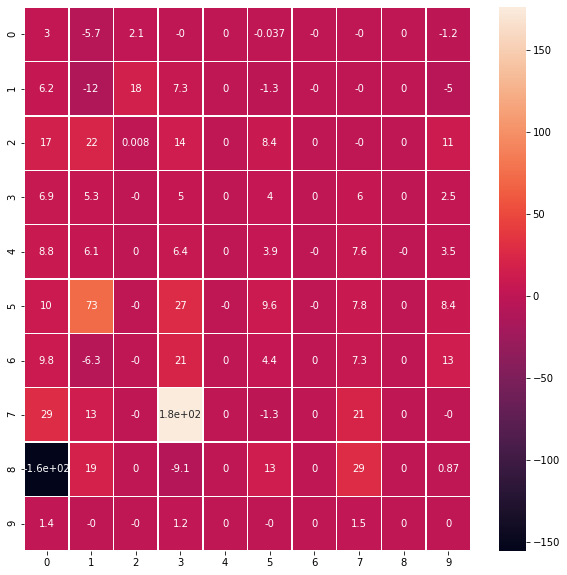

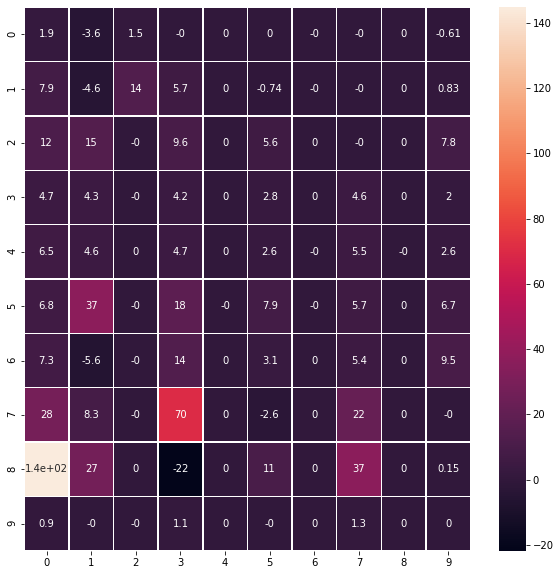

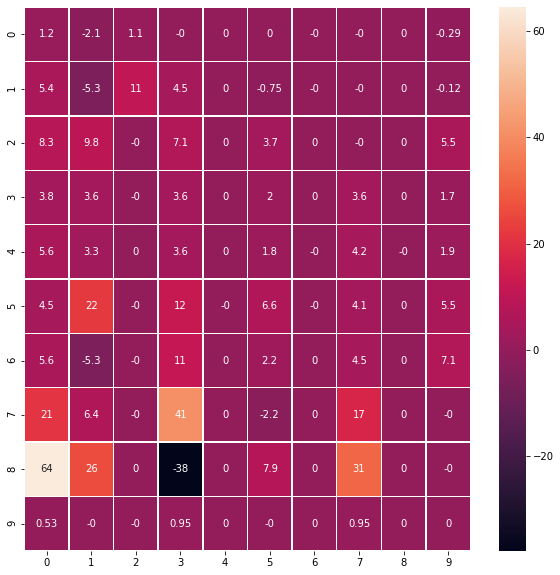

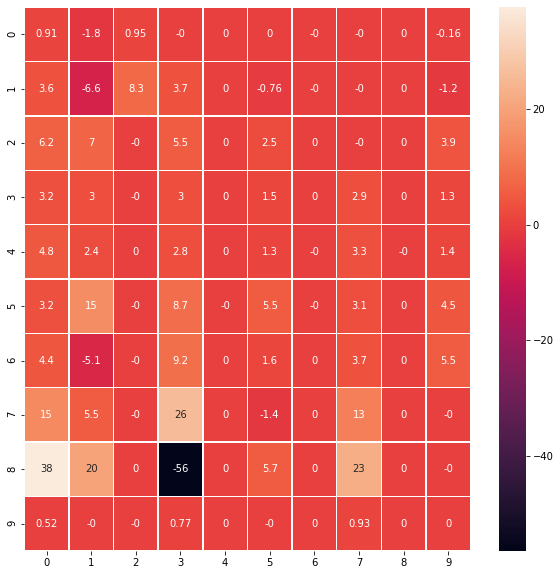

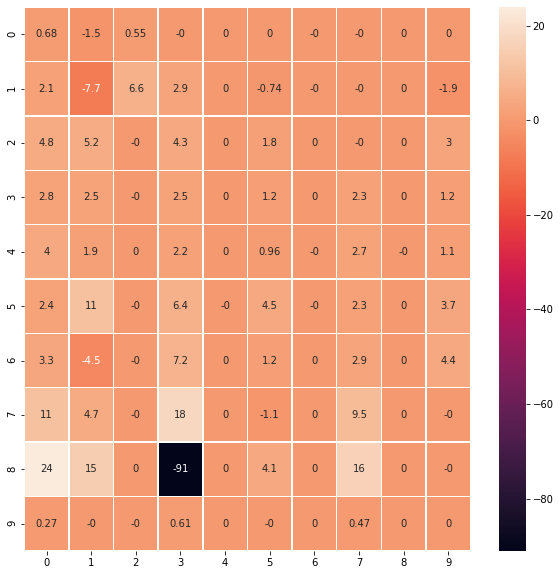

In [12]:
record_tracker.dump_all_weights()

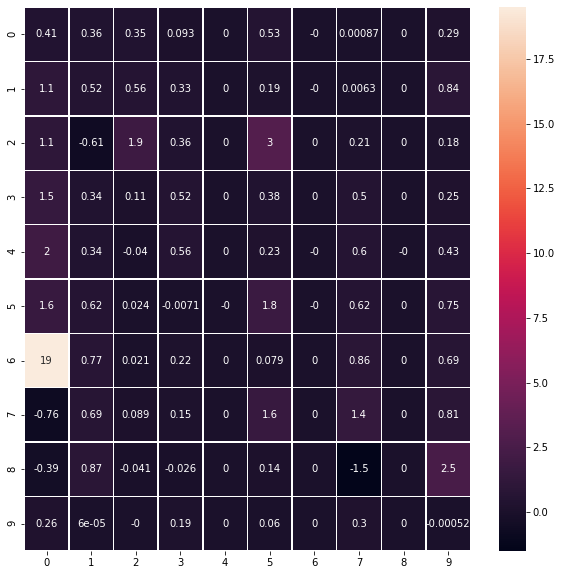

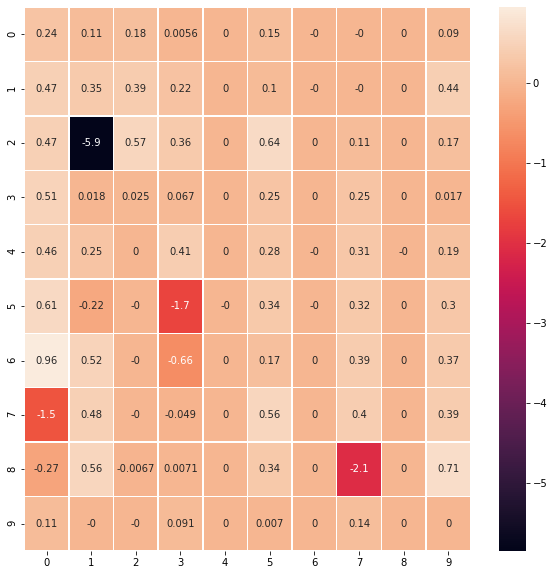

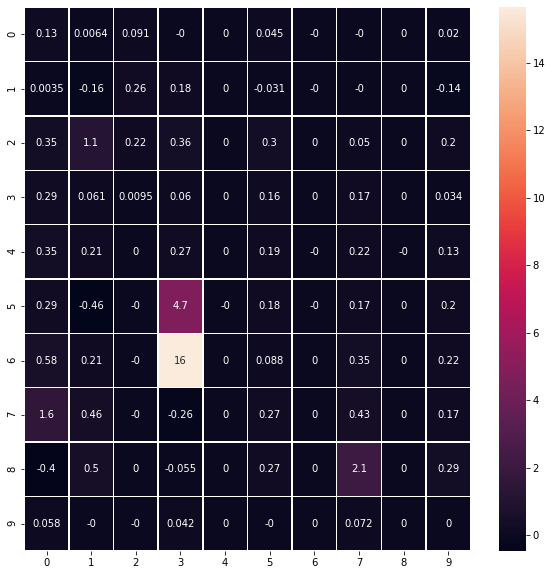

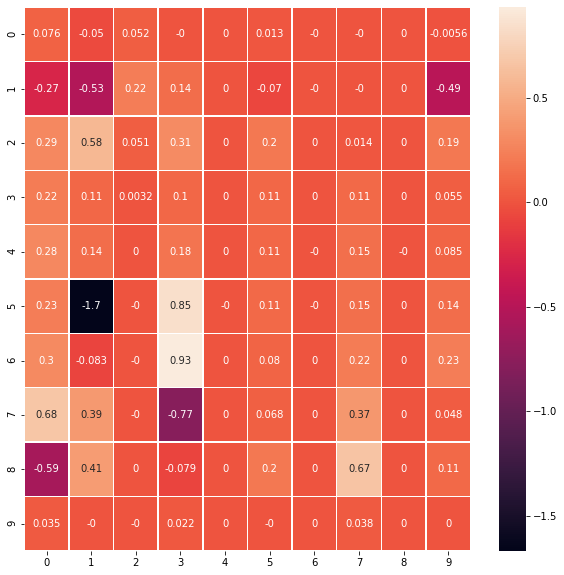

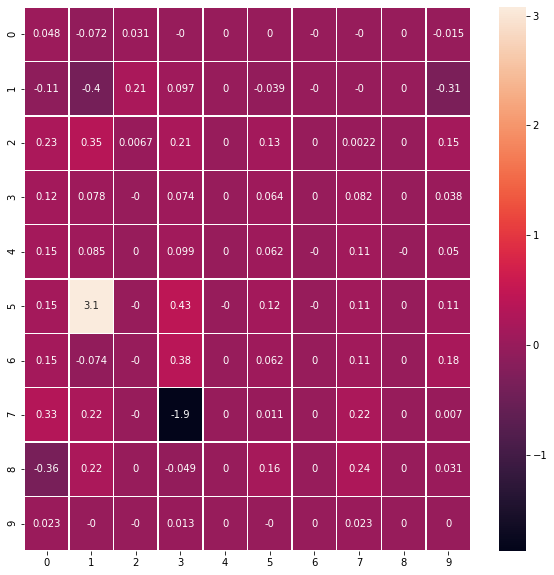

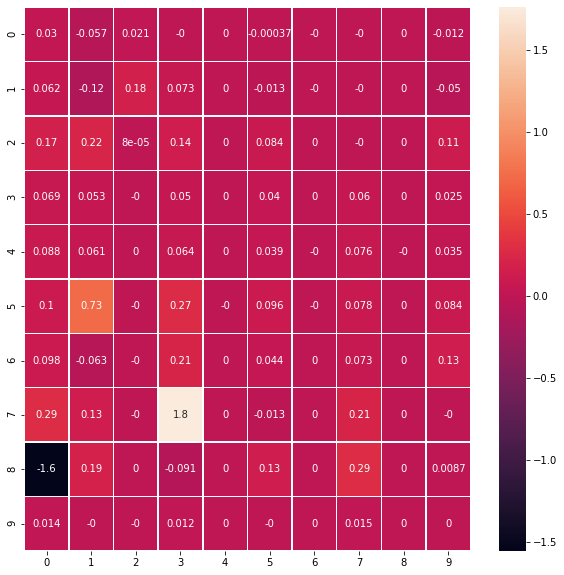

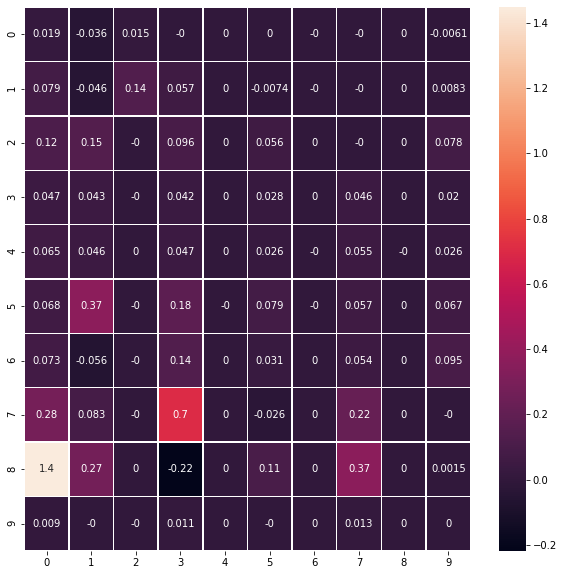

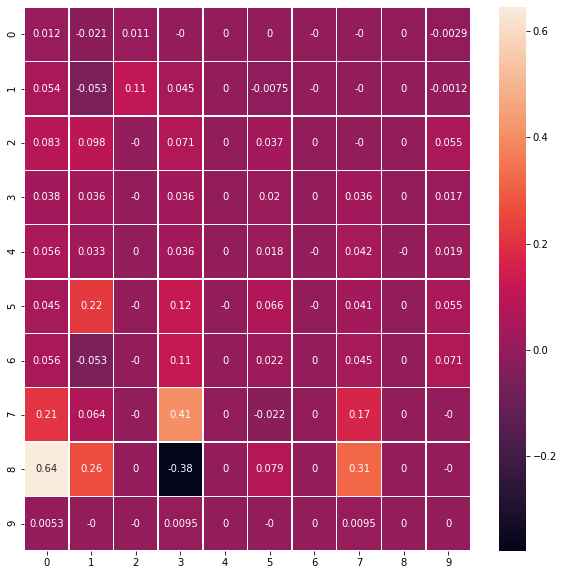

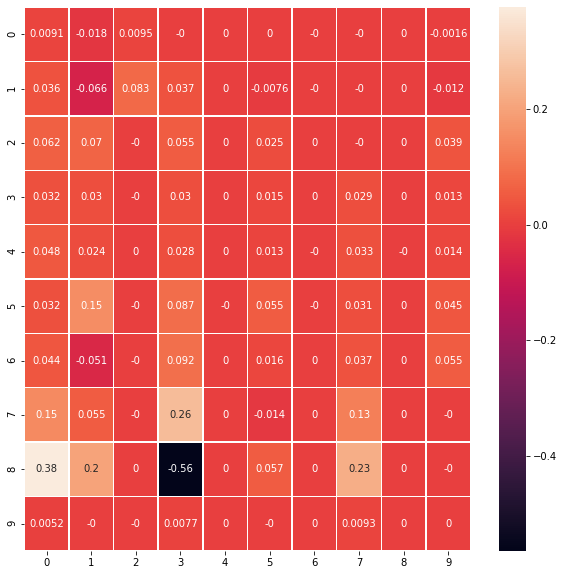

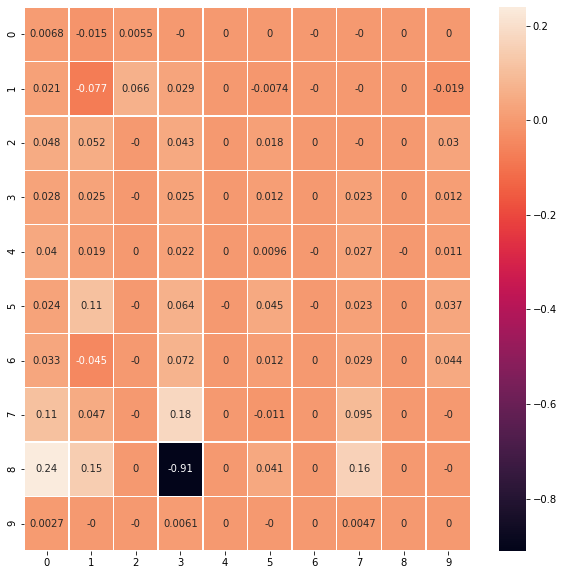

In [26]:
tensor_list = record_tracker.rec_dic[1]
for i,t in enumerate(tensor_list):
        if i>1:
          record_tracker.show_tensor((tensor_list[i]-tensor_list[i-1])/tensor_list[i])
          # plt.plot_surface(range(10), range(10), tensor_list[i])

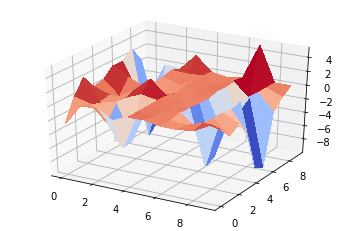

In [37]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
# X = np.arange(0,10,1)
# Y = np.arange(0,10,1)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, tensor_list[i].numpy(), cmap=cm.coolwarm, linewidth=0, antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-10, 10)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()